In [ ]:
pip install scikeras[tensorflow]

     |████████████████████████████████| 462 kB 7.3 MB/s 
     |████████████████████████████████| 97 kB 2.8 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
  Attempting uninstall: markdown
    Found existing installation: Markdown 3.3.6
    Uninstalling Markdown-3.3.6:
      Successfully uninstalled Markdown-3.3.6


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Flatten, MaxPooling2D, SpatialDropout2D, BatchNormalization
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

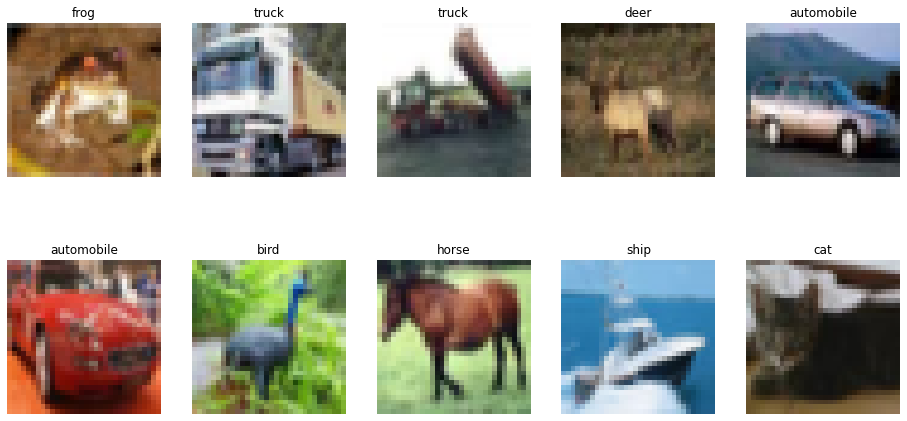

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 8))
image_index = 0
for i in range(2):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[image_index][0]])
        axes[i,j].imshow(x_train[image_index])
        axes[i,j].axis('off')
        image_index += 1
plt.show()

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
(x_train, x_valid)=x_train[5000:], x_train[:5000]
(y_train, y_valid)=y_train[5000:], y_train[:5000]

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_valid=tf.keras.utils.to_categorical(y_valid,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [ ]:
# x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
# x_valid = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_valid])
# x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

In [ ]:
shape = x_train.shape[1]

In [ ]:
# x_train = x_train.reshape(x_train.shape[0],shape,shape,1)
# x_valid = x_valid.reshape(x_valid.shape[0],shape,shape,1)
# x_test = x_test.reshape(x_test.shape[0],shape,shape,1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],shape,shape,3)
x_valid = x_valid.reshape(x_valid.shape[0],shape,shape,3)
x_test = x_test.reshape(x_test.shape[0],shape,shape,3)

In [ ]:
def create_model(alpha=0.0001, drop_out=0.2, activation='relu', loss=tf.keras.losses.CategoricalCrossentropy()):

  model = Sequential()
  # model.add(Flatten(input_shape = (image_size, image_size, 1), name='Input_layer'))
  # model.add(Dense(hidden1, activation=activation, name='First_hidden_layer'))
  # model.add(Dropout(drop_out, name='First_layer_Dropout'))
  # model.add(Dense(hidden2, activation=activation, name='Second_hidden_layer'))  
  # model.add(Dropout(drop_out, name='Second_layer_Dropout'))
  # model.add(Dense(hidden3, activation=activation, name='Third_hidden_layer'))  
  # model.add(Dropout(drop_out, name='Third_layer_Dropout'))
  # model.add(Dense(10, activation='softmax', name='Output_layer'))

  # model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))
  
  # model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))
  # model.add(Flatten())
  # model.add(Dense(512, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.4))
  # model.add(Dense(10, activation='softmax', name='Output_layer'))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax', name='Output_layer'))


  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=alpha), loss = loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  # model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=alpha), loss = loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  # model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=alpha), loss=loss, metrics=['accuracy'])
  # model.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])
  
  model.summary()
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=1)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True, min_delta=0.03 )

In [ ]:
model = create_model(drop_out=0.5, activation='relu', loss=tf.keras.losses.CategoricalCrossentropy())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
import time
epochs = 30
start = time.time()
train = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_valid, y_valid), shuffle=True, callbacks=[callback])
end = time.time()

Epoch 1/30
1407/1407 [==============================] - 29s 20ms/step - loss: 2.0962 - accuracy: 0.3505 - precision_1: 0.4304 - recall_1: 0.2499 - val_loss: 1.4621 - val_accuracy: 0.4856 - val_precision_1: 0.6310 - val_recall_1: 0.3468
Epoch 2/30
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5769 - accuracy: 0.4706 - precision_1: 0.5719 - recall_1: 0.3605 - val_loss: 1.2012 - val_accuracy: 0.5786 - val_precision_1: 0.7041 - val_recall_1: 0.4512
Epoch 3/30
1407/1407 [==============================] - 27s 19ms/step - loss: 1.3648 - accuracy: 0.5309 - precision_1: 0.6397 - recall_1: 0.4169 - val_loss: 1.1423 - val_accuracy: 0.5962 - val_precision_1: 0.7104 - val_recall_1: 0.4896
Epoch 4/30
1407/1407 [==============================] - 26s 19ms/step - loss: 1.2142 - accuracy: 0.5795 - precision_1: 0.6879 - recall_1: 0.4697 - val_loss: 1.1973 - val_accuracy: 0.5922 - val_precision_1: 0.7016 - val_recall_1: 0.5004
Epoch 5/30
1407/1407 [==============================] - 

In [ ]:
run_time = end - start
run_time

580.7065768241882

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.6593 - accuracy: 0.7735 - precision_1: 0.8295 - recall_1: 0.7210


In [ ]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_test_rev_labels = y_test.argmax(1)

In [ ]:
precision = precision_score(y_test_rev_labels, predicted_classes, average='macro')
recall = recall_score(y_test_rev_labels, predicted_classes, average='macro')
f1 = f1_score(y_test_rev_labels, predicted_classes, average='macro')

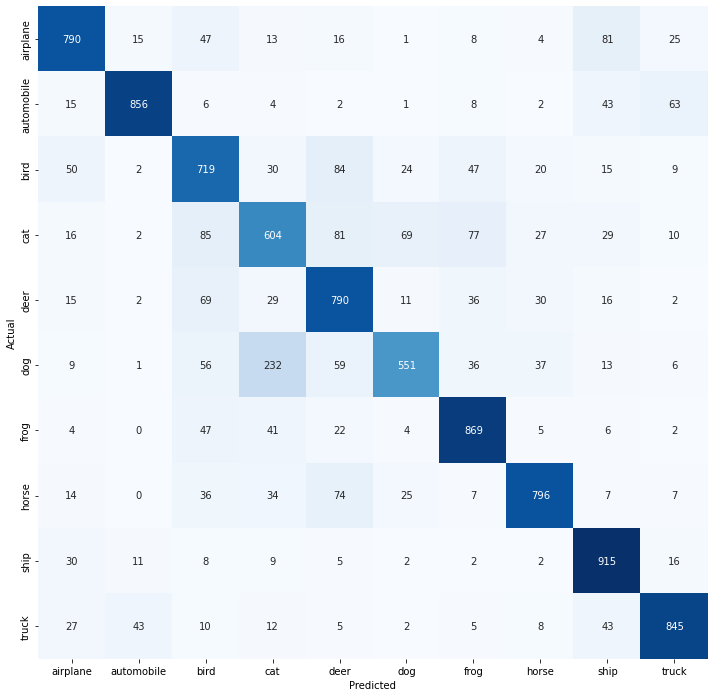

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_rev_labels, predicted_classes)
plt.figure(figsize=(12,12))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
history.history['callback']

NameError: ignored

In [ ]:
train.history['loss'][-1]

0.484510213136673

In [ ]:
epochs = 22

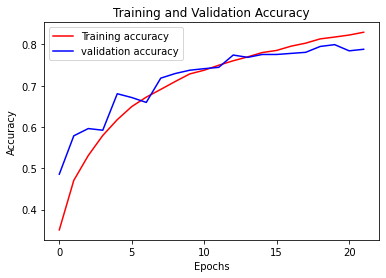

In [ ]:
epochs_range = range(0,epochs)
plt.plot(epochs_range, train.history['accuracy'][:epochs], 'r', label='Training accuracy')
plt.plot(epochs_range, train.history['val_accuracy'][:epochs], 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

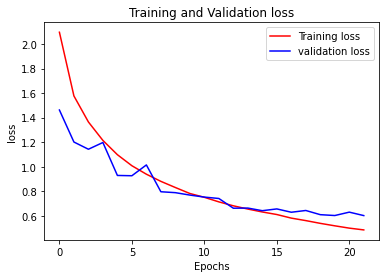

In [ ]:
epochs_range = range(0,epochs)
plt.plot(epochs_range, train.history['loss'][:epochs], 'r', label='Training loss')
plt.plot(epochs_range, train.history['val_loss'][:epochs], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df = {'Label': labels,
        'Precision':precision_score(y_test_rev_labels, predicted_classes, average=None),
        'Recall':recall_score(y_test_rev_labels, predicted_classes, average=None),
        'F1-Score':f1_score(y_test_rev_labels, predicted_classes, average=None),
        }

data = pd.DataFrame(df)
# data.index = labels

In [ ]:
data

,Label,Precision,Recall,F1-Score
0,airplane,0.814433,0.790,0.802030
1,automobile,0.918455,0.856,0.886128
2,bird,0.663897,0.719,0.690350
3,cat,0.599206,0.604,0.601594
4,deer,0.694200,0.790,0.739008
5,dog,0.798551,0.551,0.652071
6,frog,0.793607,0.869,0.829594
7,horse,0.854995,0.796,0.824443
8,ship,0.783390,0.915,0.844096
9,truck,0.857868,0.845,0.851385


In [ ]:
df2 = {'Training Accuracy': train.history['accuracy'][-1],
        'Training Loss':train.history['loss'][-1],
        'Validation Accuracy':train.history['val_accuracy'][-1],
        'Validation Loss':train.history['val_loss'][-1],
        }
data2 = pd.DataFrame(df2, index=[0])

In [ ]:
data2

,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
0,0.829667,0.48451,0.7884,0.601324


In [ ]:
df3 = {'Test  Accuracy': score[1],
        'Test  Loss':score[0],
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1-Score':f1,
        }
data3 = pd.DataFrame(df3, index=[0])

In [ ]:
data3

,Test Accuracy,Test Loss,Test Precision,Test Recall,Test F1-Score
0,0.7735,0.659284,0.77786,0.7735,0.77207
